In [2]:
import numpy as np
import pandas as pd
from dataset.load import load_df, select_feature
from dataset.preprocess import *
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def change_UK(val):
    if val == "United Kingdom of Great Britain and Northern Ireland":
        return "UK"

In [4]:
df = select_feature()
print(f"Dataframe shape: {df.shape}")
df.head(3)

Dataframe shape: (14287, 10)


,RemoteWork,EdLevel,YearsCodePro,DevType,LanguageHaveWorkedWith,PlatformHaveWorkedWith,ToolsTechHaveWorkedWith,Country,Age,Salary
379,Remote,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,Data scientist or machine learning specialist,JavaScript;Julia;Python;SQL;TypeScript,Amazon Web Services (AWS);Cloudflare;Digital O...,Ansible;Make;Vite,Turkey,35-44 years old,91295.0
385,Remote,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",17,"Developer, back-end",Python,Amazon Web Services (AWS);Google Cloud,Ansible;Docker;Kubernetes;Pip,France,35-44 years old,53703.0
392,"Hybrid (some remote, some in-person)","Professional degree (JD, MD, Ph.D, Ed.D, etc.)",18,Engineering manager,C#;HTML/CSS;Java;JavaScript;MicroPython;Python...,Amazon Web Services (AWS),Gradle;Maven (build tool),United Kingdom of Great Britain and Northern I...,35-44 years old,161044.0


In [5]:
df = df["Country"].apply(change_UK)

AGE


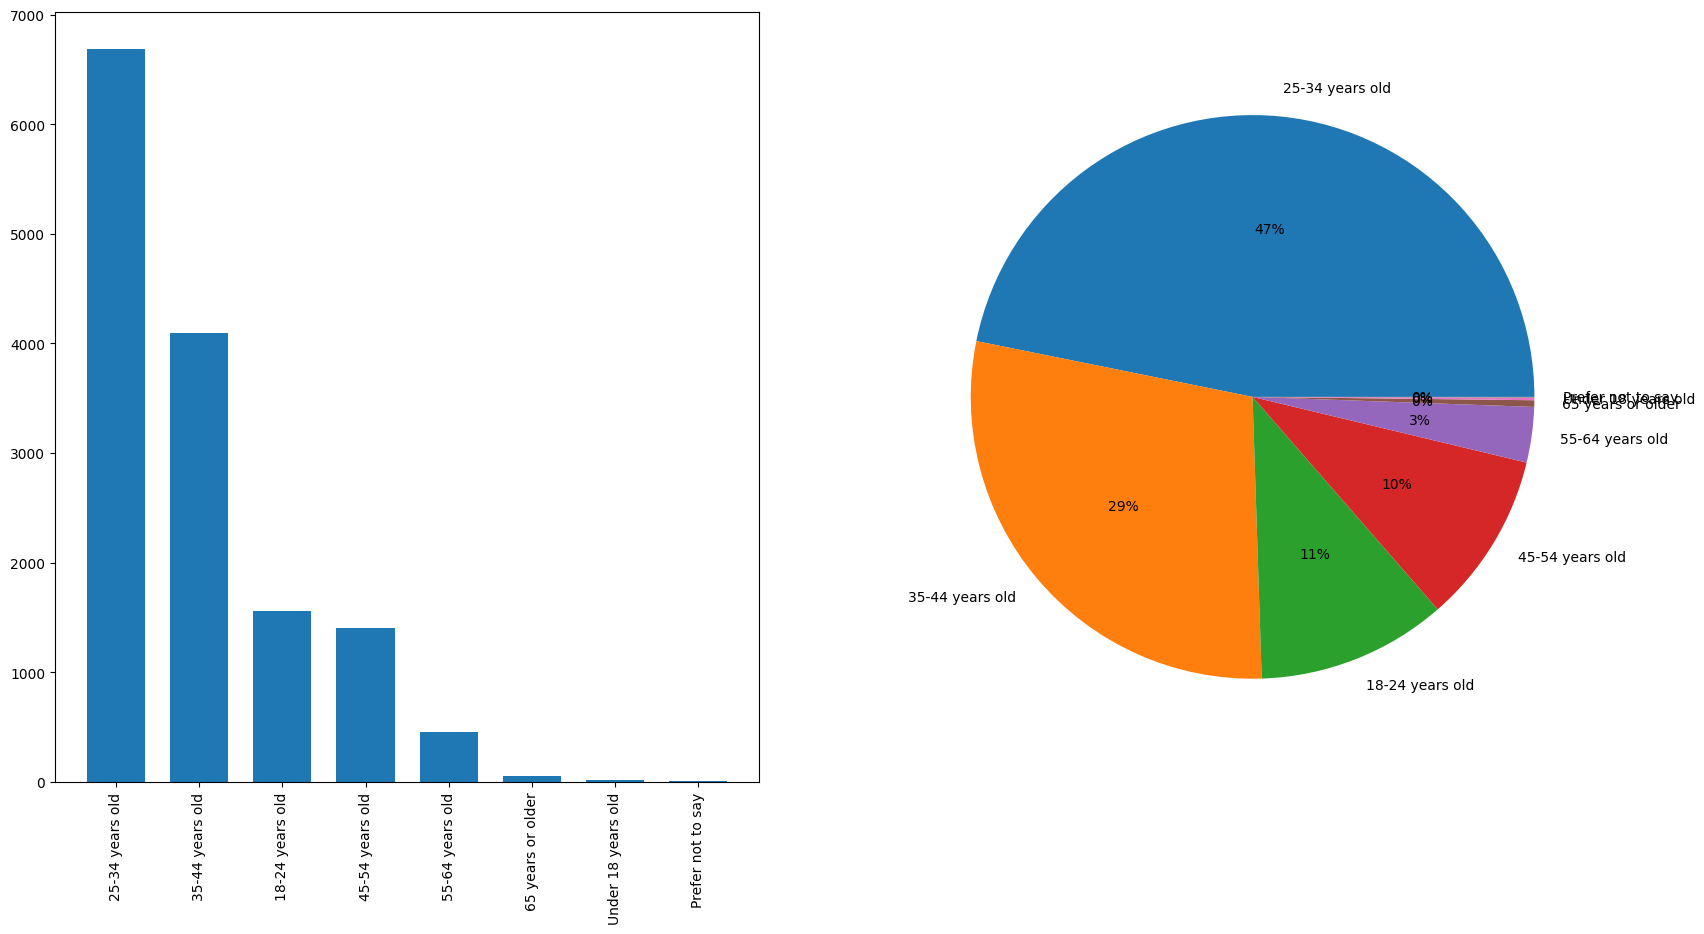

In [6]:
# Re-load the full dataframe to access the 'Age' column
full_df = select_feature()

age = full_df["Age"].value_counts()

label = age.index
value = age.values

plt.figure(figsize=(20, 10))
plt.subplot(1,2,1)
plt.bar(label, value, width=0.7)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.pie(x=value, labels=label, autopct='%.0f%%')

plt.show()

REMOTE WORK

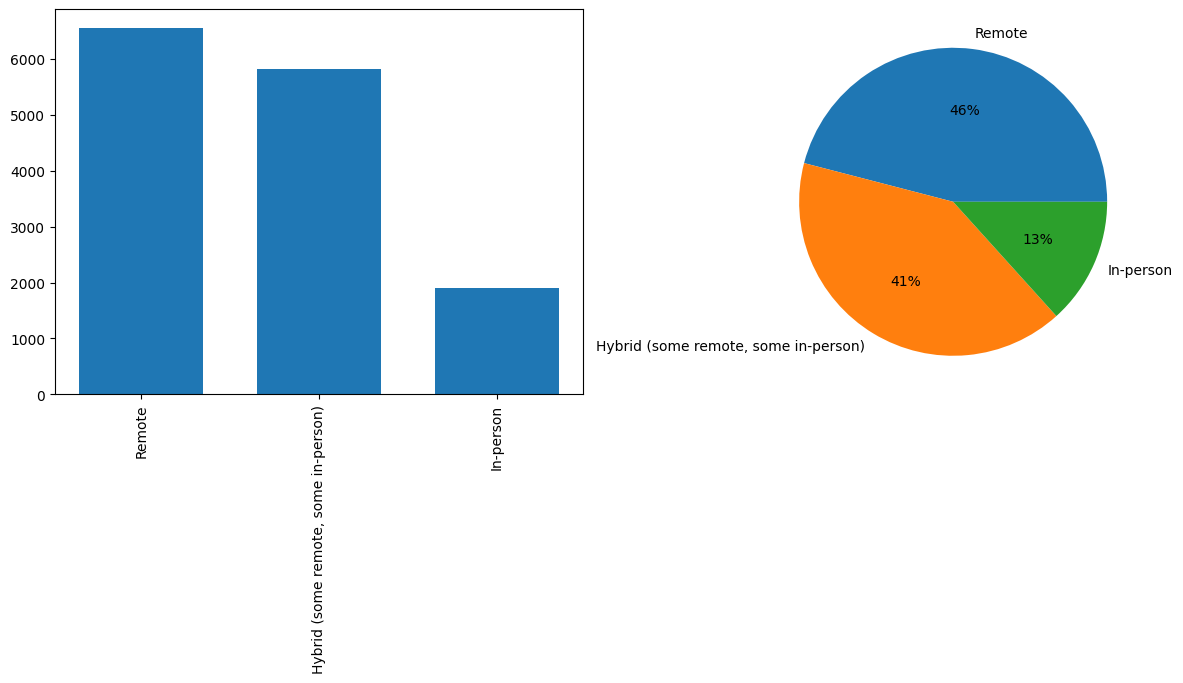

In [7]:
remote = full_df["RemoteWork"].value_counts()

label = remote.index
value = remote.values

plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.bar(label, value, width=0.7)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.pie(x=value, labels=label, autopct='%.0f%%')

plt.show()

EdLevel

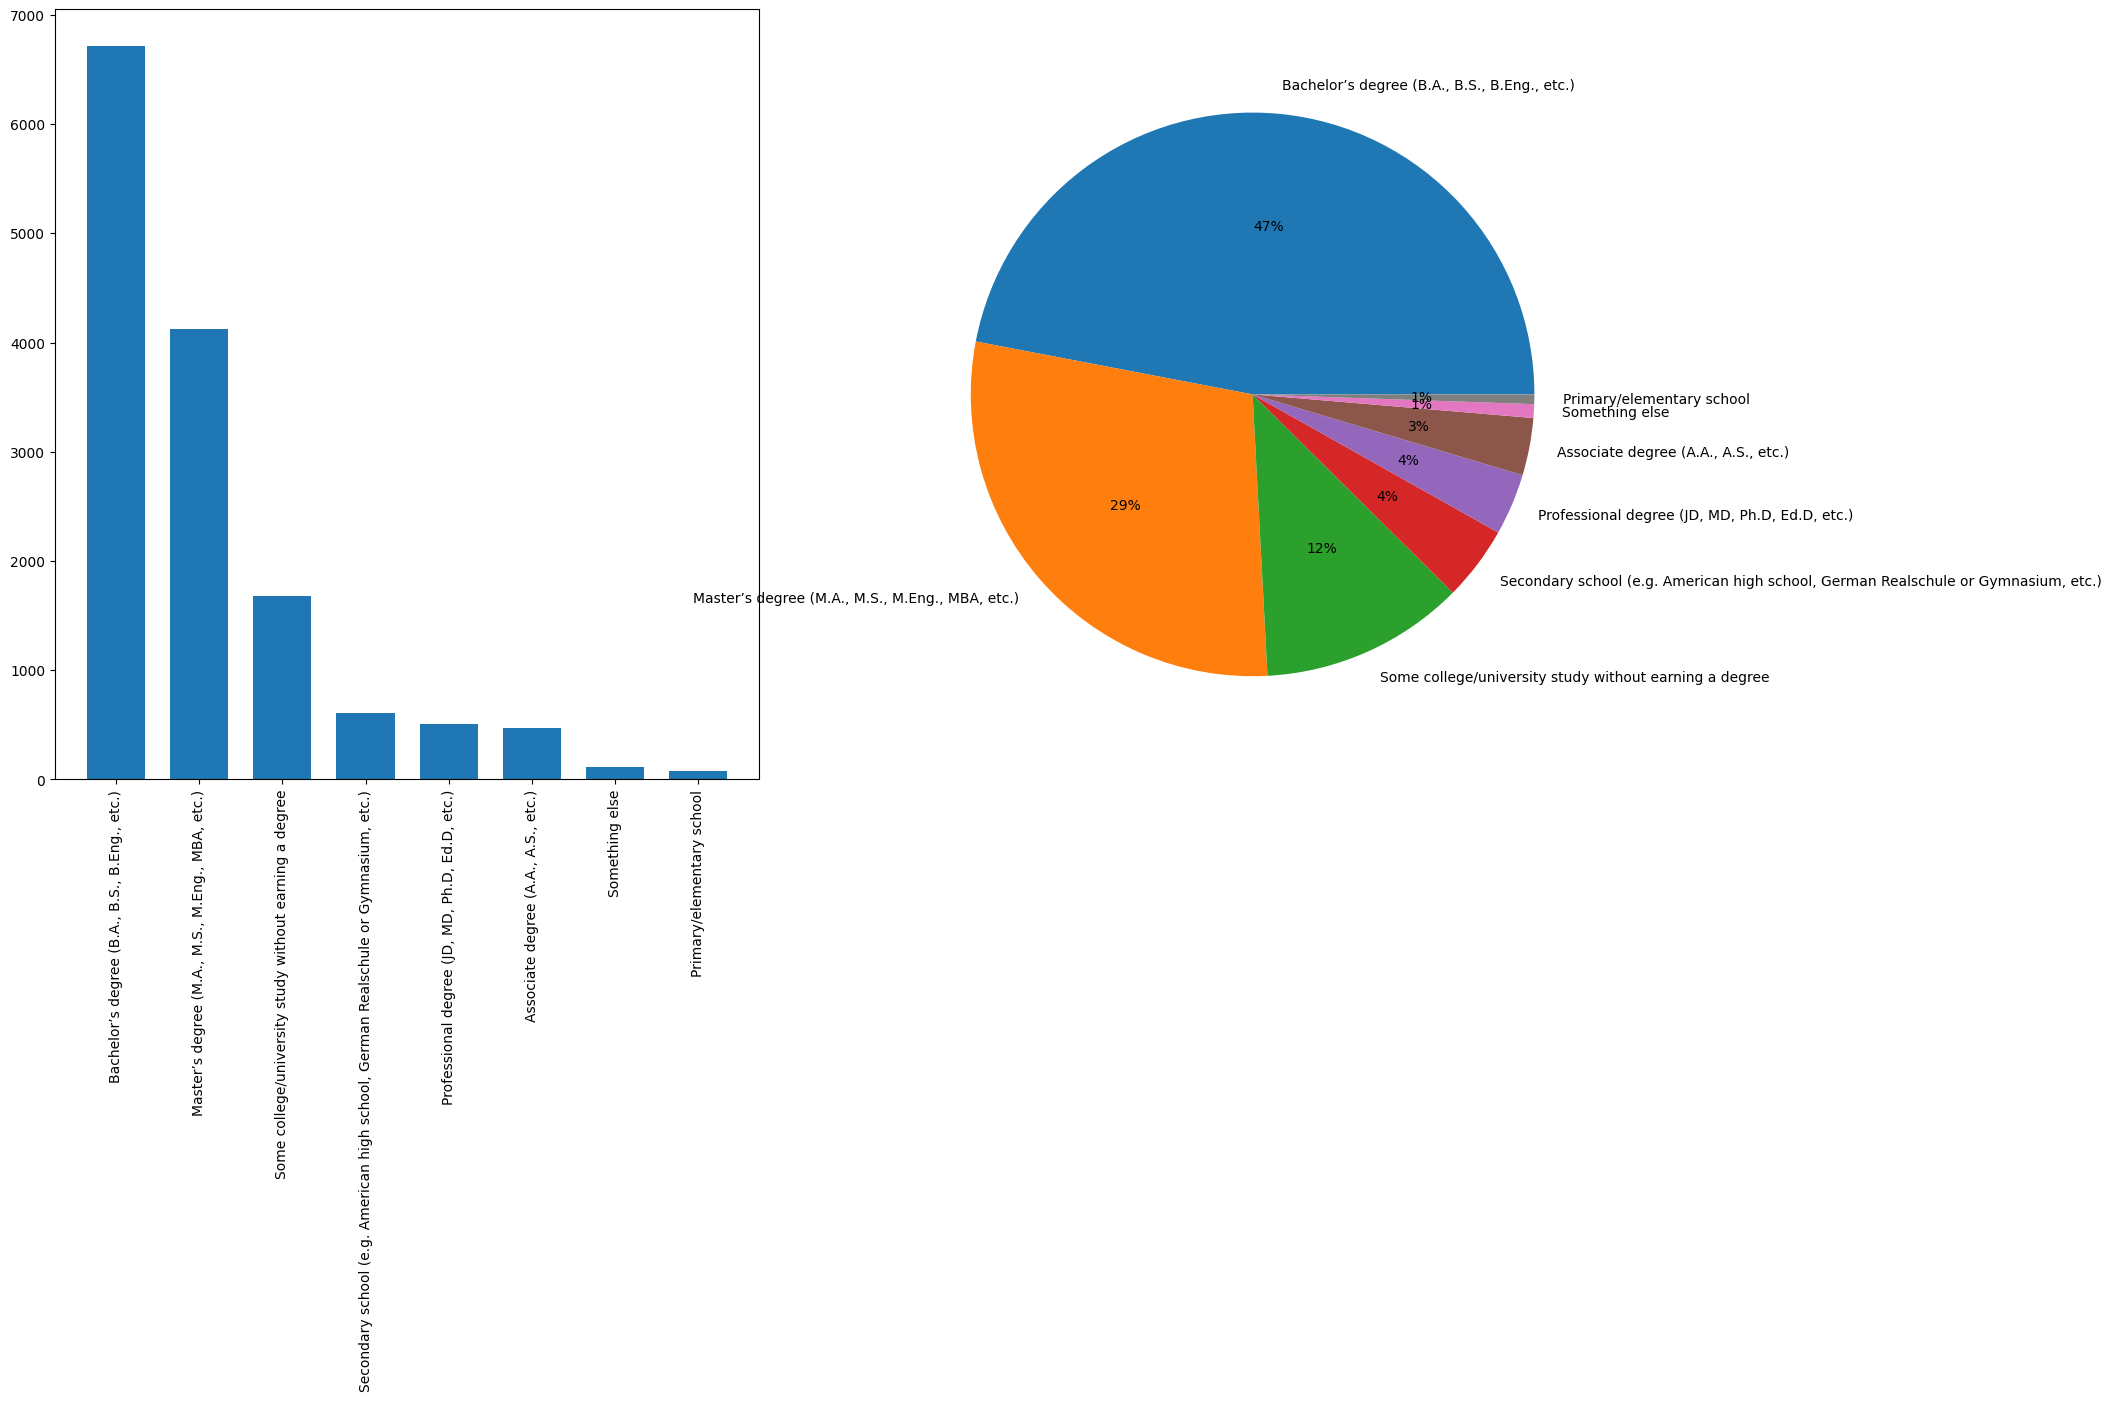

In [8]:
ed = full_df["EdLevel"].value_counts()

label = ed.index
value = ed.values

plt.figure(figsize=(20, 10))
plt.subplot(1,2,1)
plt.bar(label, value, width=0.7)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.pie(x=value, labels=label, autopct='%.0f%%')

plt.show()

In [9]:
full_df["EdLevel"] = full_df["EdLevel"].apply(clean_education)

Country

In [10]:
full_df["Country"].value_counts().loc["Sri Lanka"]


41

In [11]:
country_map = shorten_categories(full_df["Country"].value_counts(), 200)
full_df["Country"] = full_df["Country"].map(country_map)
full_df["Country"].value_counts()

Country
Other                                                   4319
United States of America                                3015
Germany                                                  964
United Kingdom of Great Britain and Northern Ireland     917
Ukraine                                                  914
India                                                    682
Canada                                                   572
France                                                   499
Brazil                                                   431
Poland                                                   351
Spain                                                    350
Netherlands                                              344
Australia                                                333
Italy                                                    307
Sweden                                                   289
Name: count, dtype: int64

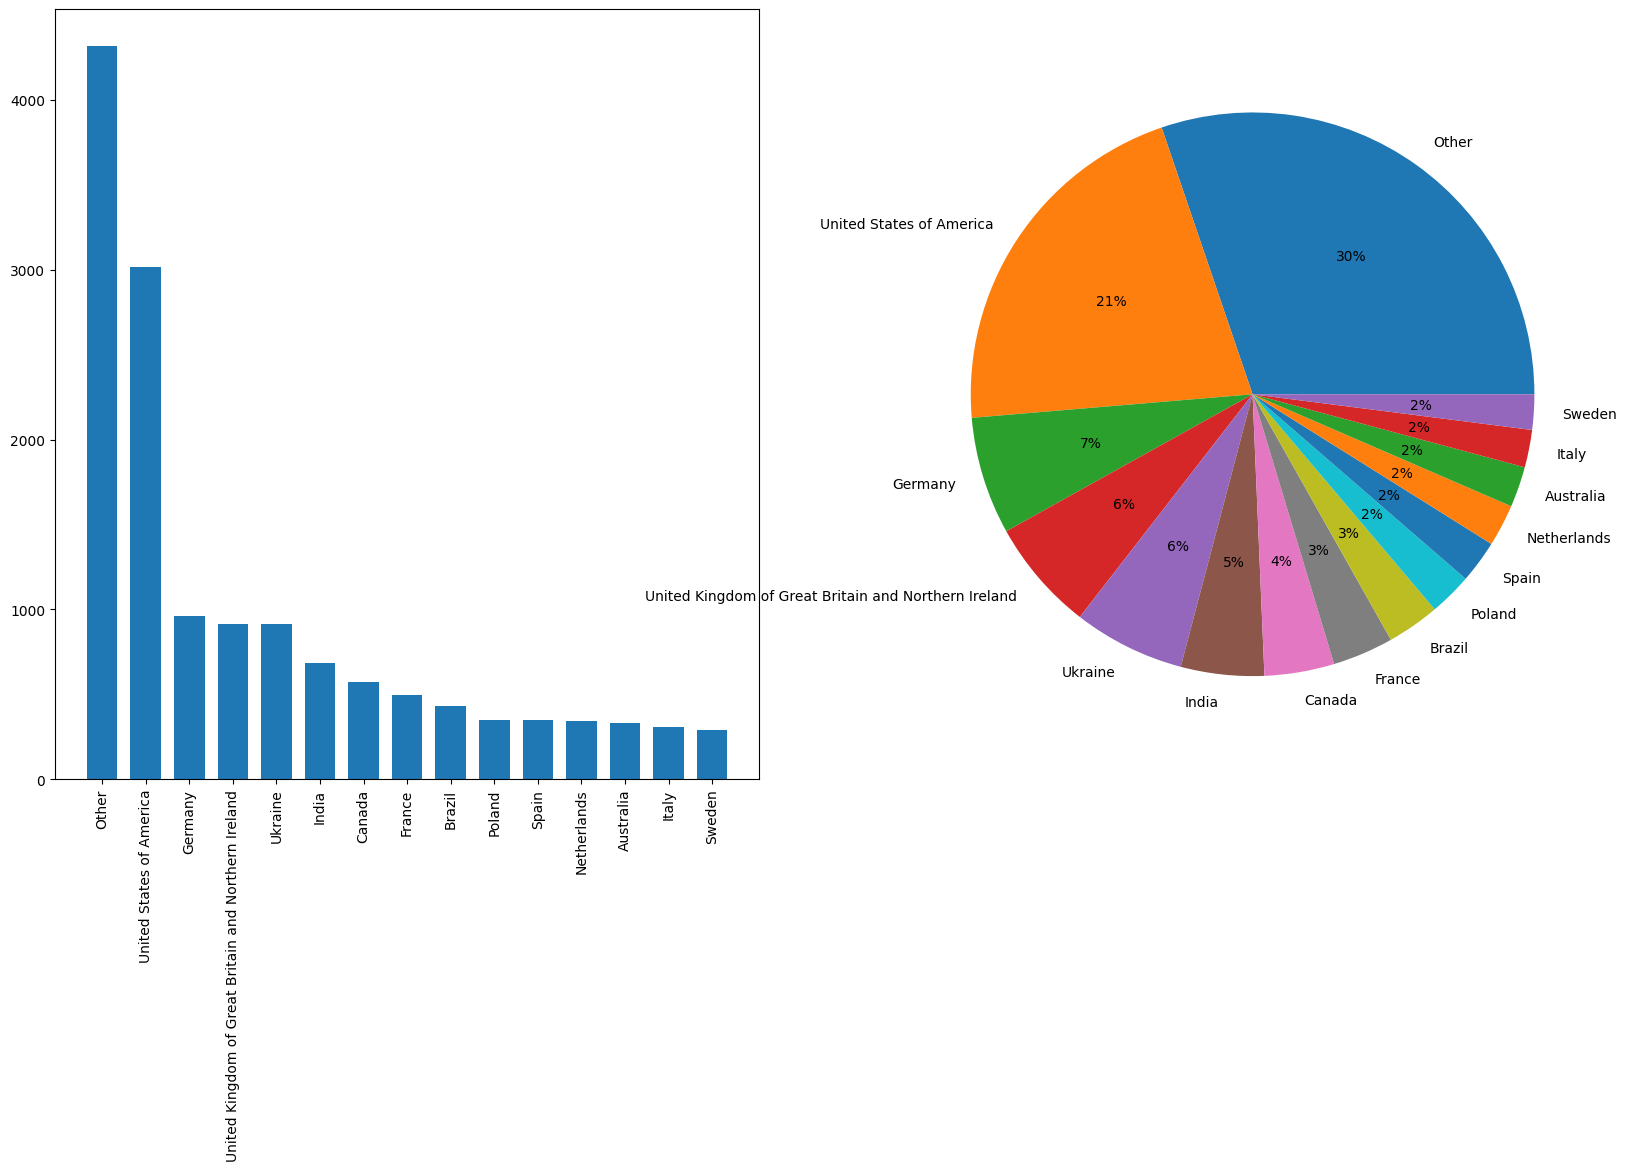

In [12]:
country = full_df["Country"].value_counts()

label = country.index
value = country.values

plt.figure(figsize=(20, 10))
plt.subplot(1,2,1)
plt.bar(label, value, width=0.7)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.pie(x=value, labels=label, autopct='%.0f%%')

plt.show()

YearCodePro

In [13]:
full_df["YearCodePro"] = full_df["YearsCodePro"].apply(YearCodeProProcess)

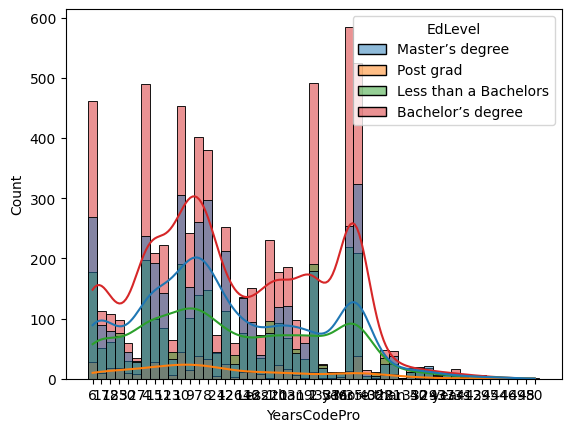

In [14]:
sns.histplot(data=full_df, x="YearsCodePro", hue="EdLevel", kde=True, bins=30)
plt.show()

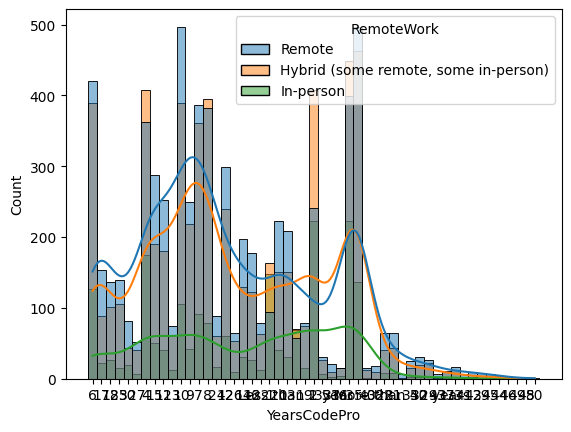

In [15]:
sns.histplot(data=full_df, x="YearsCodePro", hue="RemoteWork", kde=True, bins=30)
plt.show()

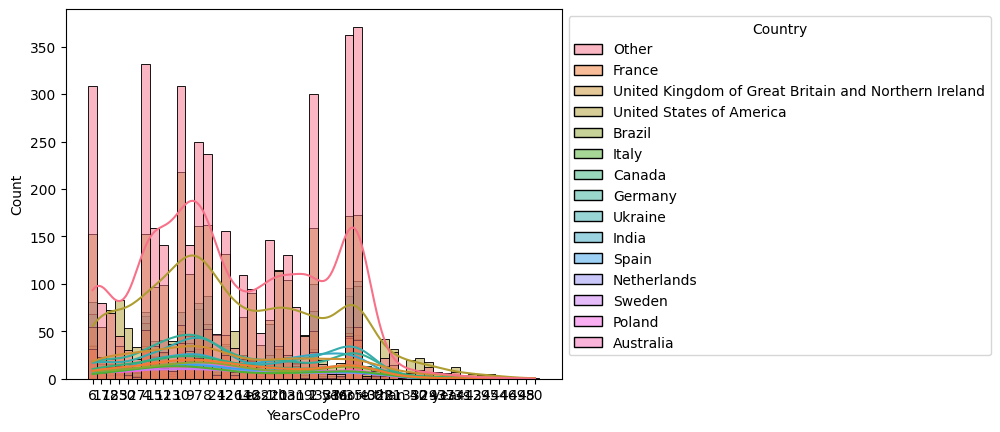

In [16]:
ax = sns.histplot(data=full_df, x="YearsCodePro", hue="Country", kde=True, bins=30)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

DevType

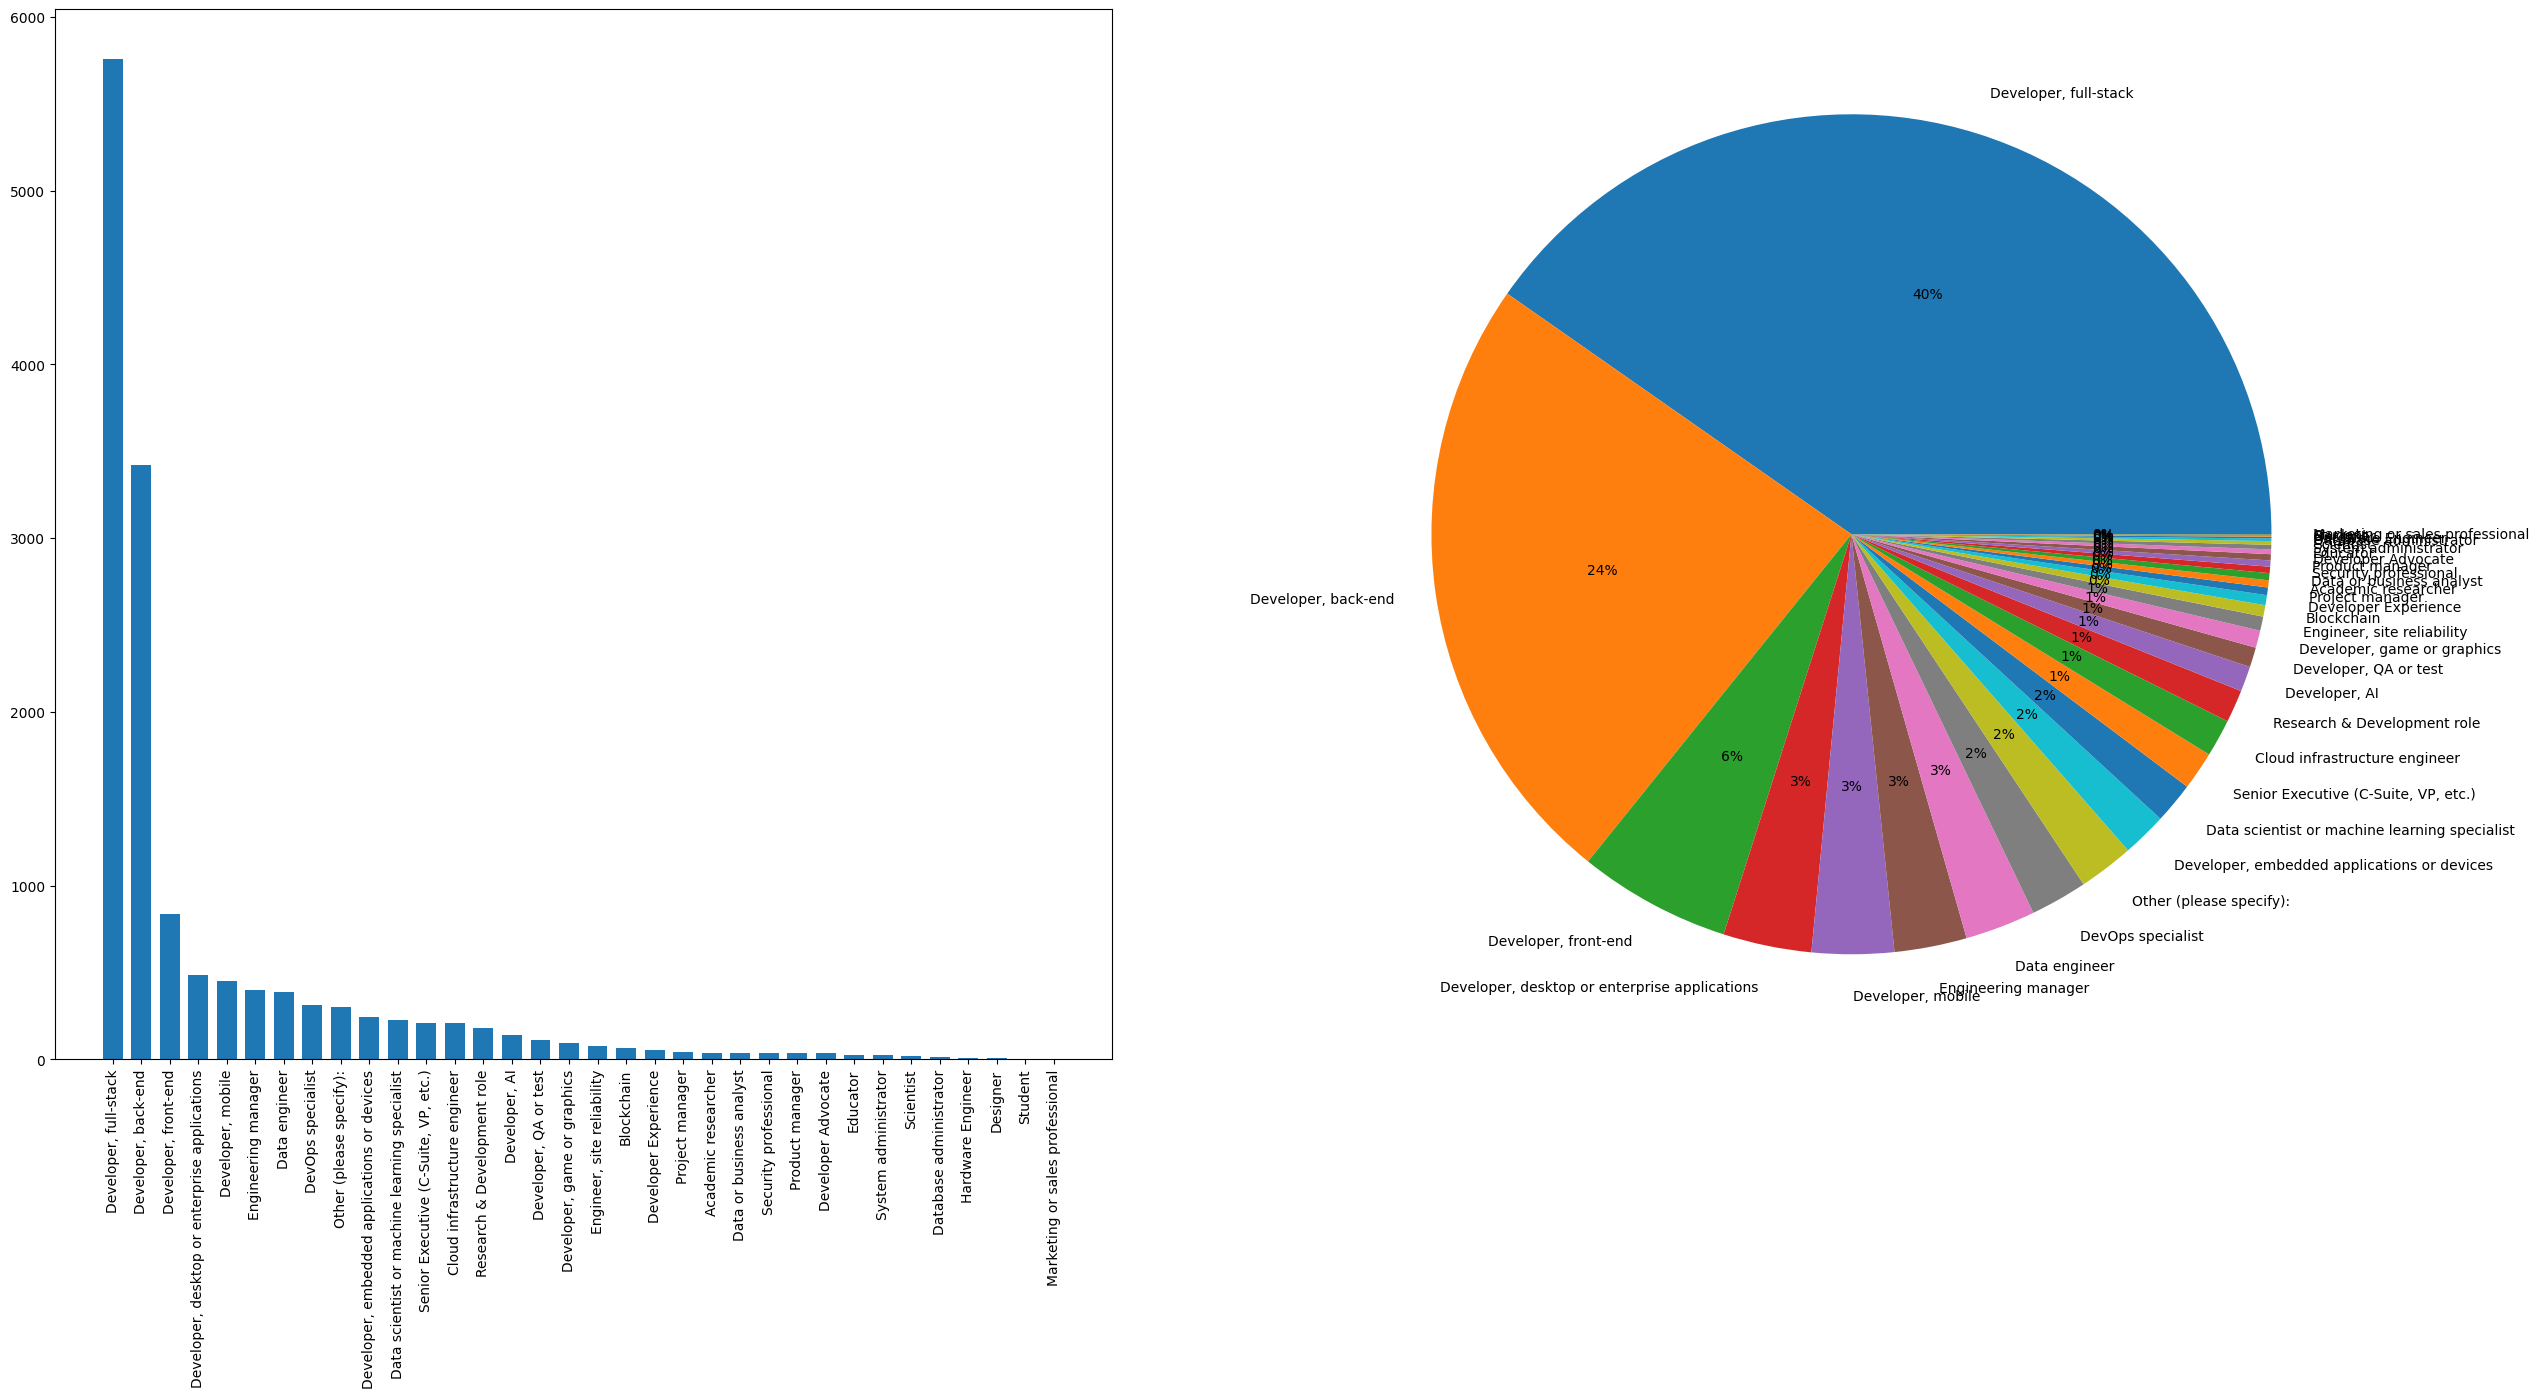

In [17]:
dev_type = split_multicolumn(full_df["DevType"])
dev_type_sum = dev_type.sum().sort_values(ascending=False)
label = dev_type_sum.index
value = dev_type_sum.values

plt.figure(figsize=(30, 30))
plt.subplot(2,2,1)
plt.bar(label, value, width=0.7)
plt.xticks(rotation=90)

plt.subplot(2,2,2)
plt.pie(x=value, labels=label, autopct='%.0f%%')

# plt.subplot(2,2,3)
# sns.heatmap(dev_type.corr())

plt.show()

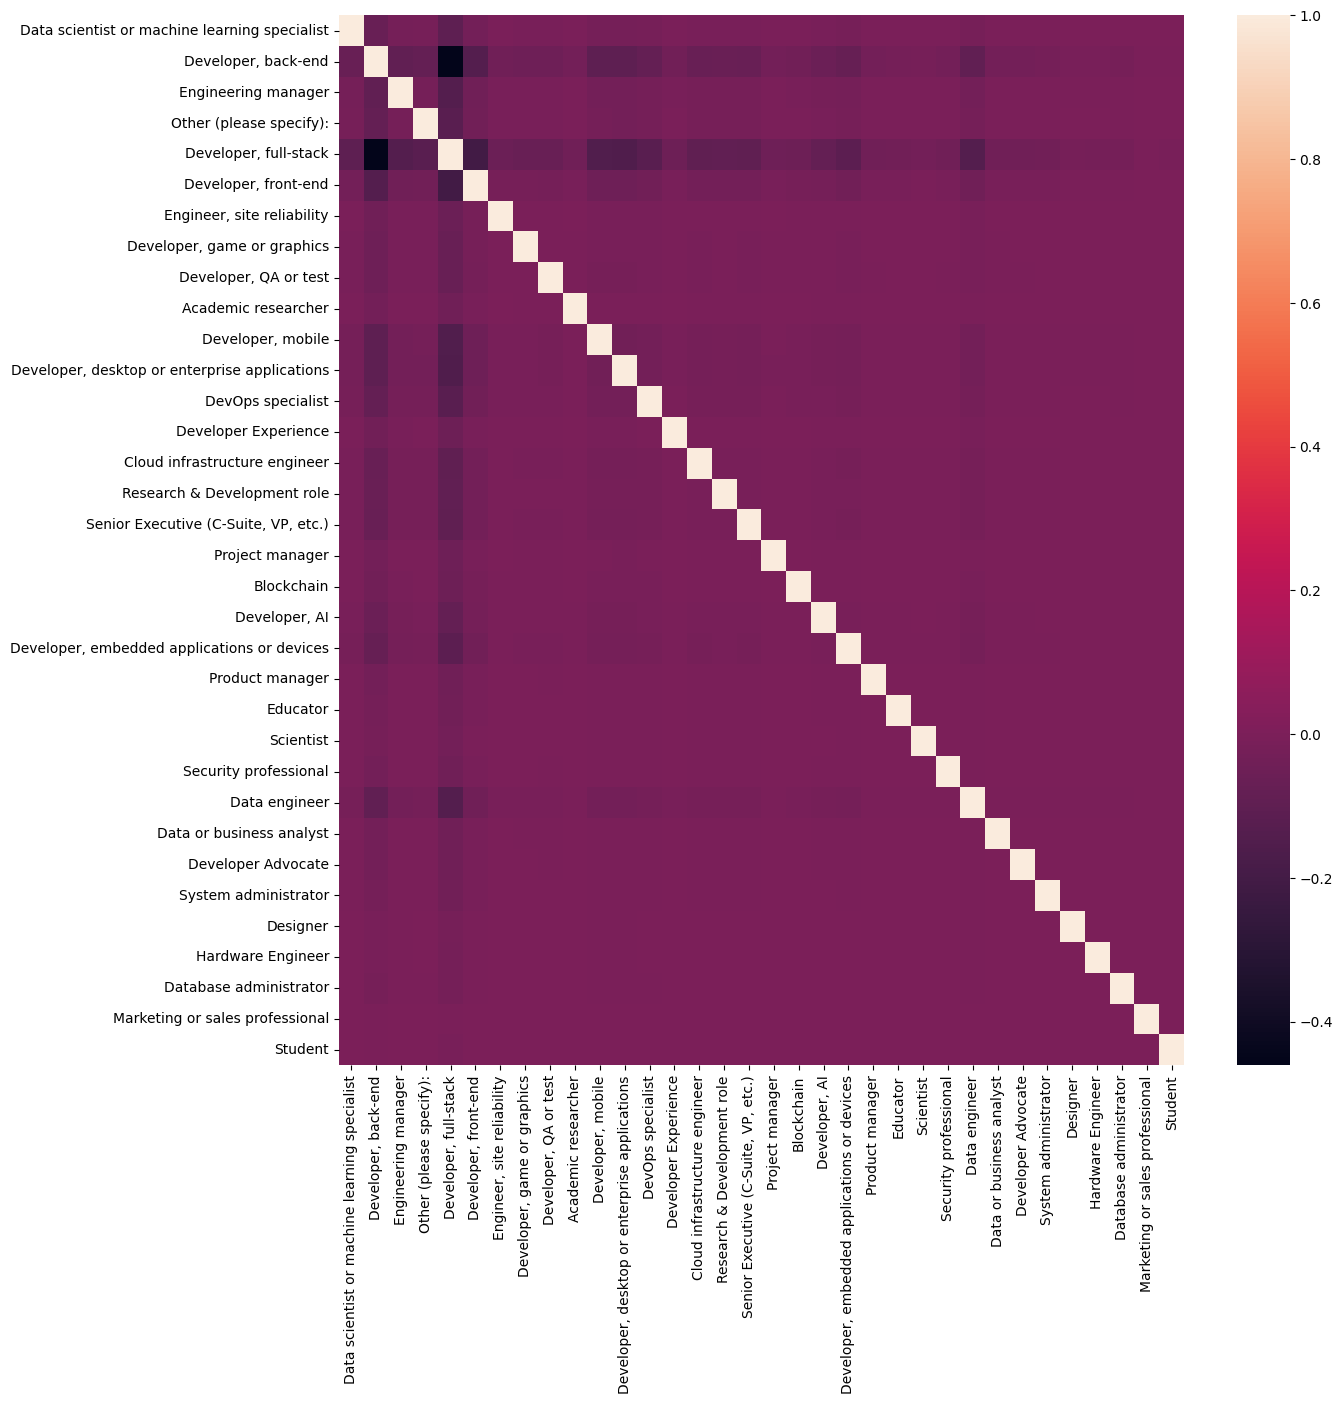

In [18]:
plt.figure(figsize=(30, 30))
plt.subplot(2,2,3)
sns.heatmap(dev_type.corr())

plt.show()

LanguageHaveWorkedWith

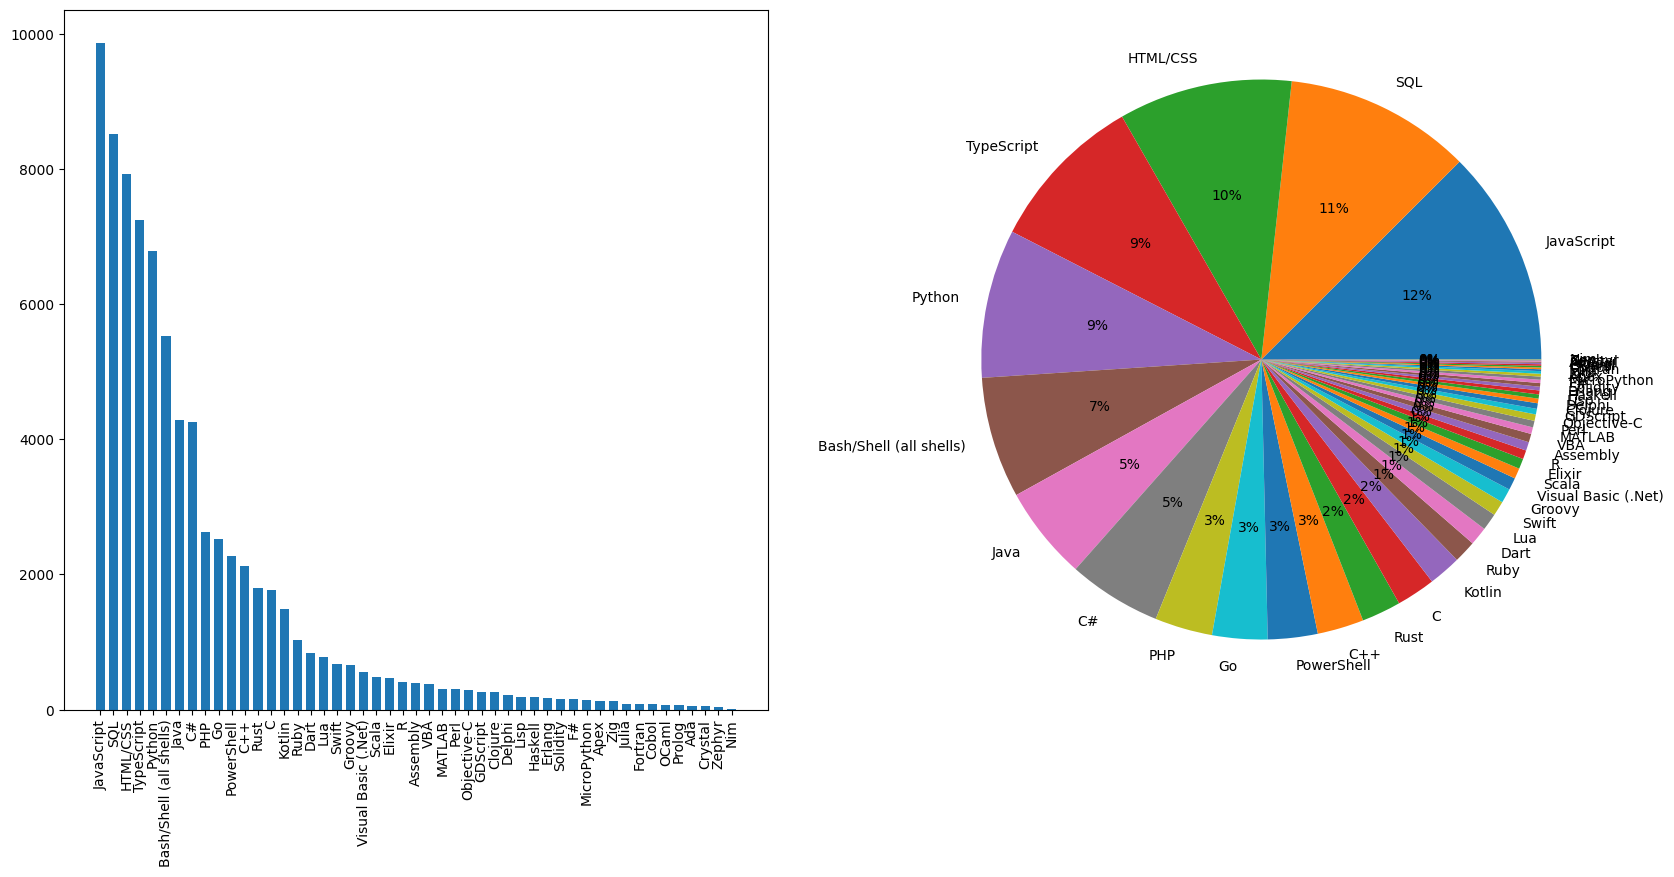

In [19]:
language = split_multicolumn(full_df["LanguageHaveWorkedWith"])
language_sum = language.sum().sort_values(ascending=False)

label = language_sum.index
value = language_sum.values

plt.figure(figsize=(20, 20))
plt.subplot(2,2,1)
plt.bar(label, value, width=0.7)
plt.xticks(rotation=90)

plt.subplot(2,2,2)
plt.pie(x=value, labels=label, autopct='%.0f%%')
plt.show()

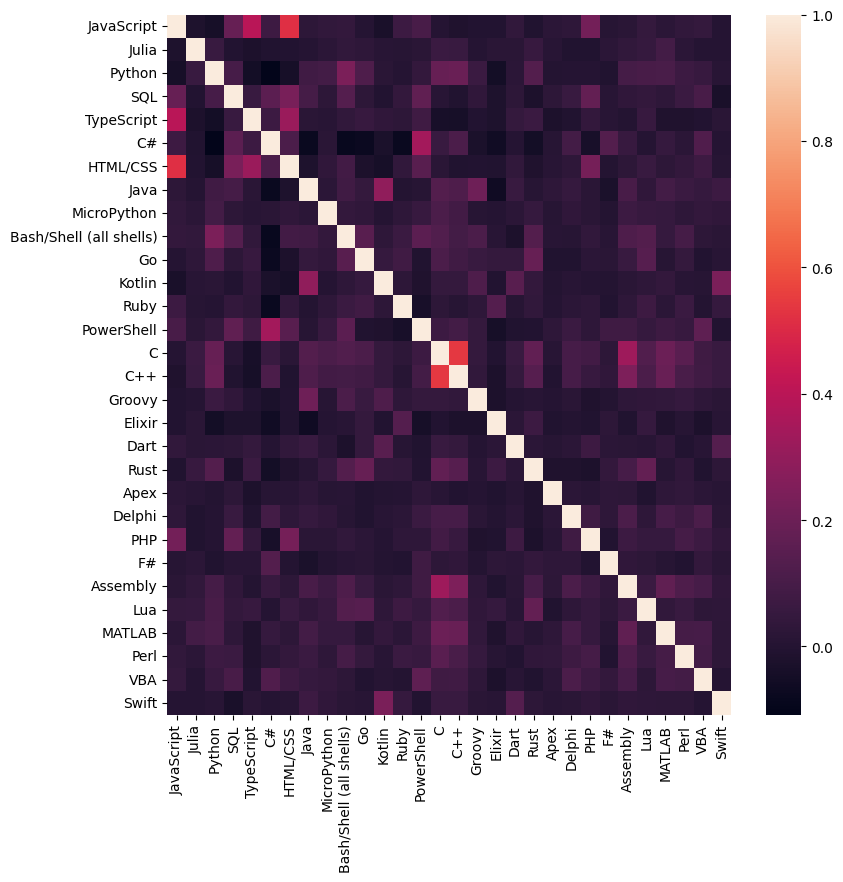

In [20]:
plt.figure(figsize=(20, 20))

plt.subplot(2,2,4)
sns.heatmap(language.iloc[:, :30].corr())

plt.show()


PlatformHaveWorkedWith

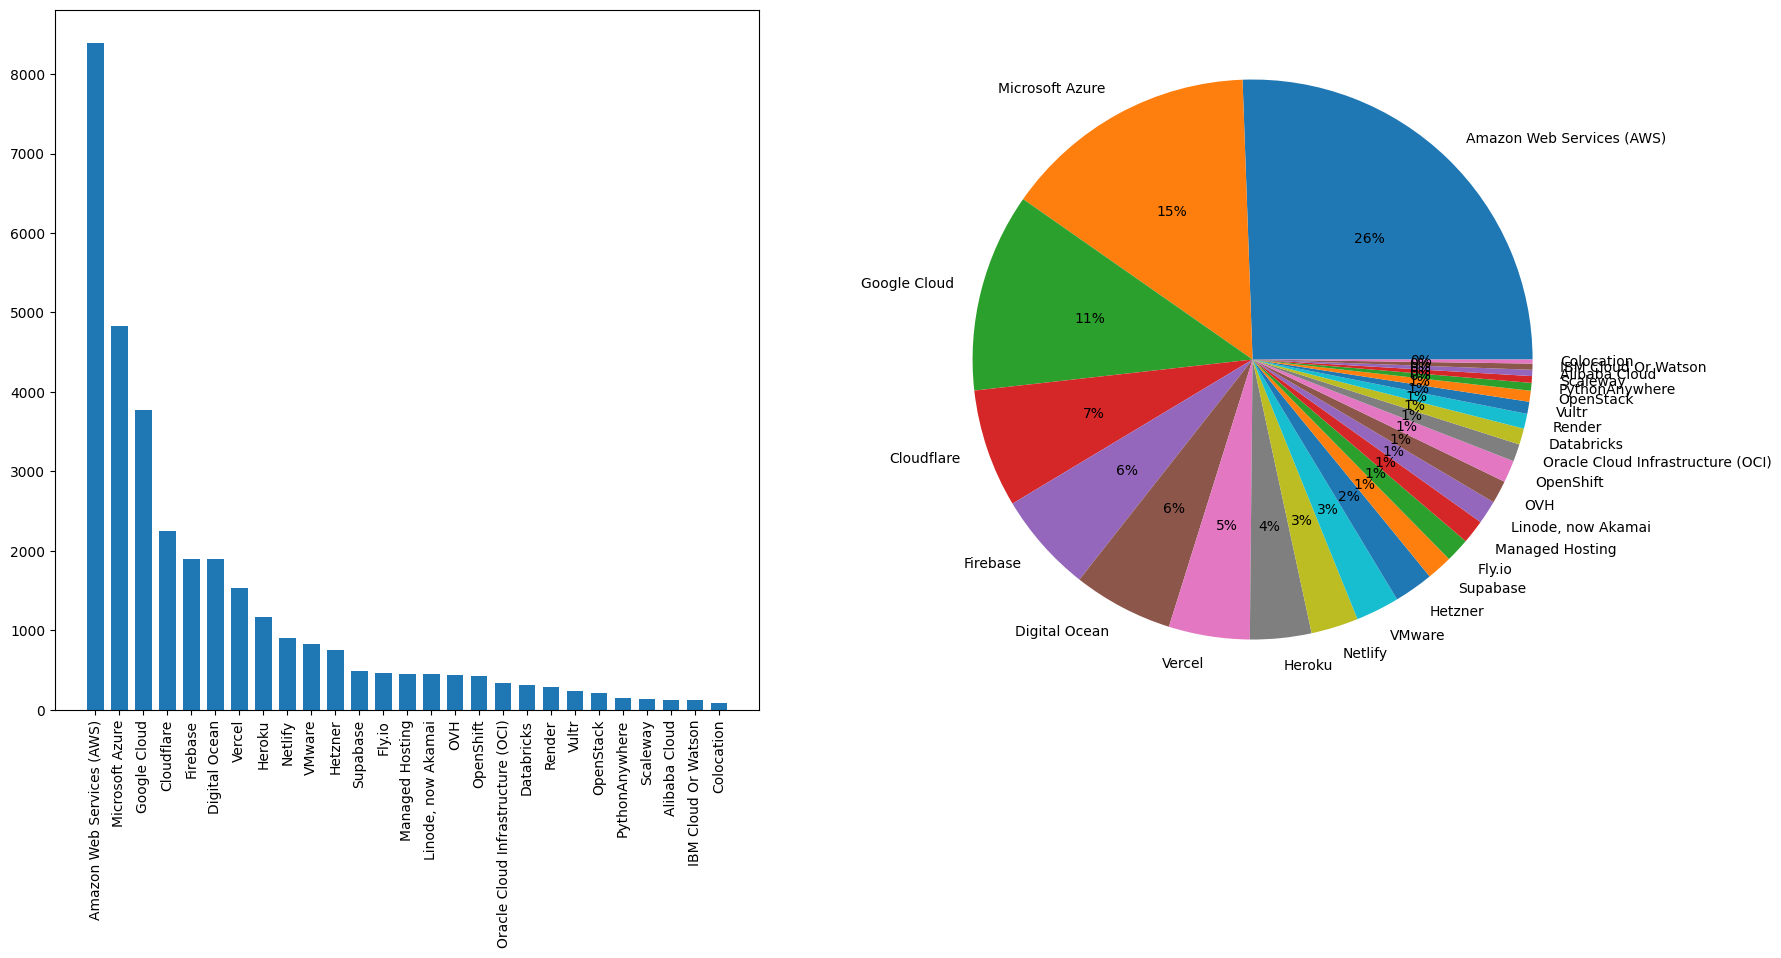

In [21]:
platform = split_multicolumn(full_df["PlatformHaveWorkedWith"])
platform_sum = platform.sum().sort_values(ascending=False)

label = platform_sum.index
value = platform_sum.values

plt.figure(figsize=(20, 20))
plt.subplot(2,2,1)
plt.bar(label, value, width=0.7)
plt.xticks(rotation=90)

plt.subplot(2,2,2)
plt.pie(x=value, labels=label, autopct='%.0f%%')

plt.show()

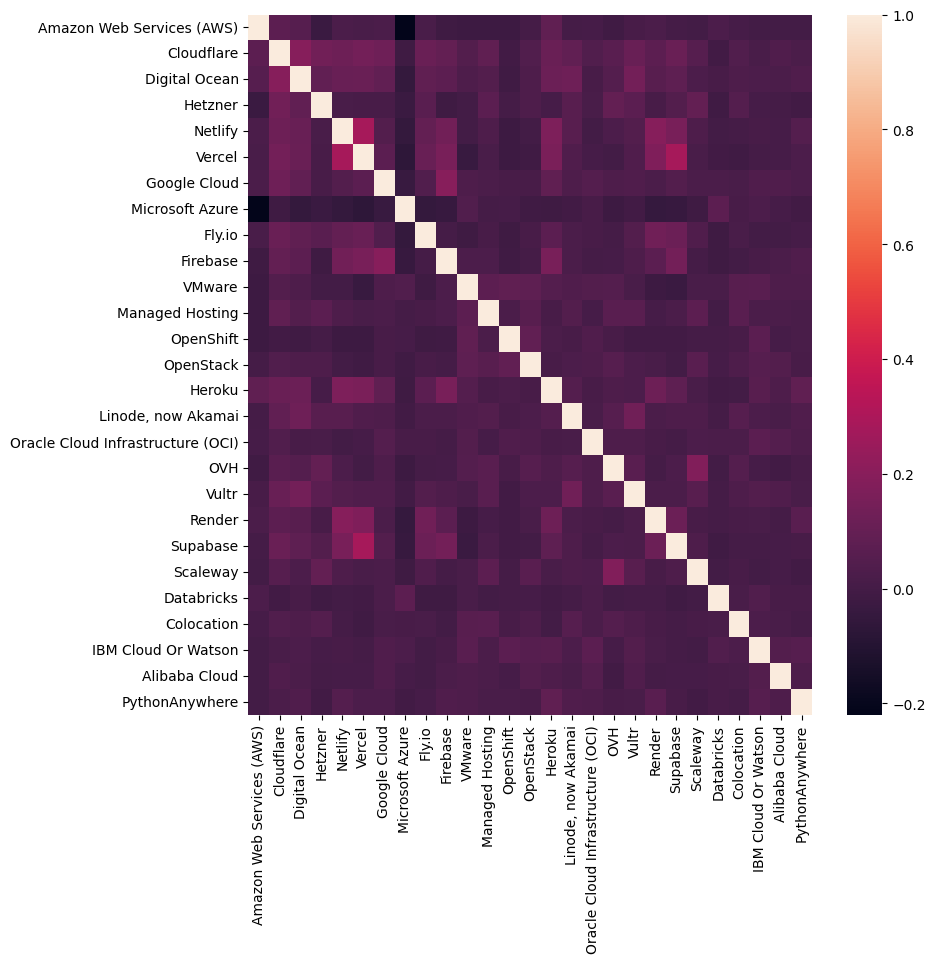

In [22]:
plt.figure(figsize=(20, 20))
plt.subplot(2,2,4)
sns.heatmap(platform.iloc[:, :30].corr())

plt.show()

ToolsTechHaveWorkedWith

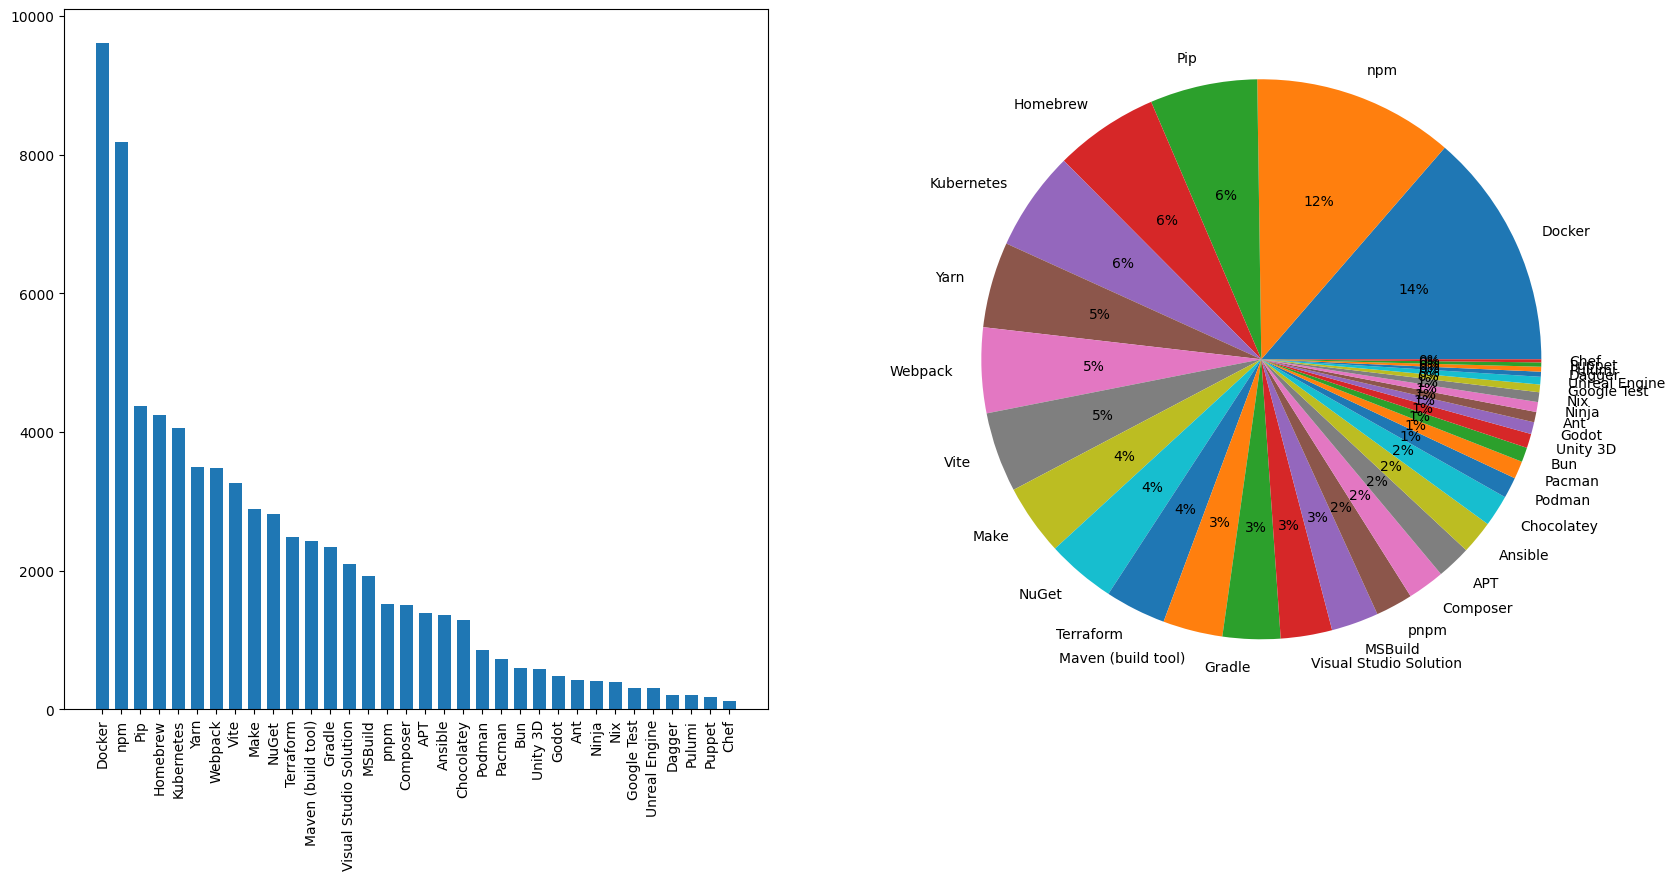

In [23]:
tool = split_multicolumn(full_df["ToolsTechHaveWorkedWith"])
tool_sum = tool.sum().sort_values(ascending=False)

label = tool_sum.index
value = tool_sum.values

plt.figure(figsize=(20, 20))
plt.subplot(2,2,1)
plt.bar(label, value, width=0.7)
plt.xticks(rotation=90)

plt.subplot(2,2,2)
plt.pie(x=value, labels=label, autopct='%.0f%%')

plt.show()

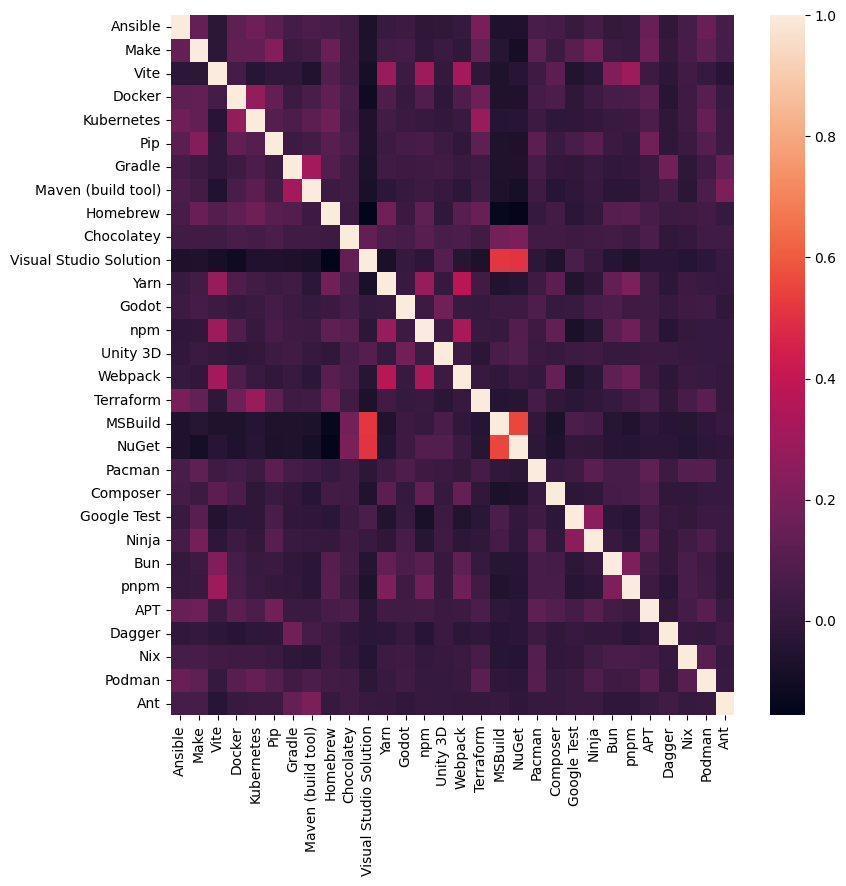

In [24]:
plt.figure(figsize=(20, 20))

plt.subplot(2,2,4)
sns.heatmap(tool.iloc[:, :30].corr())

plt.show()

Salary

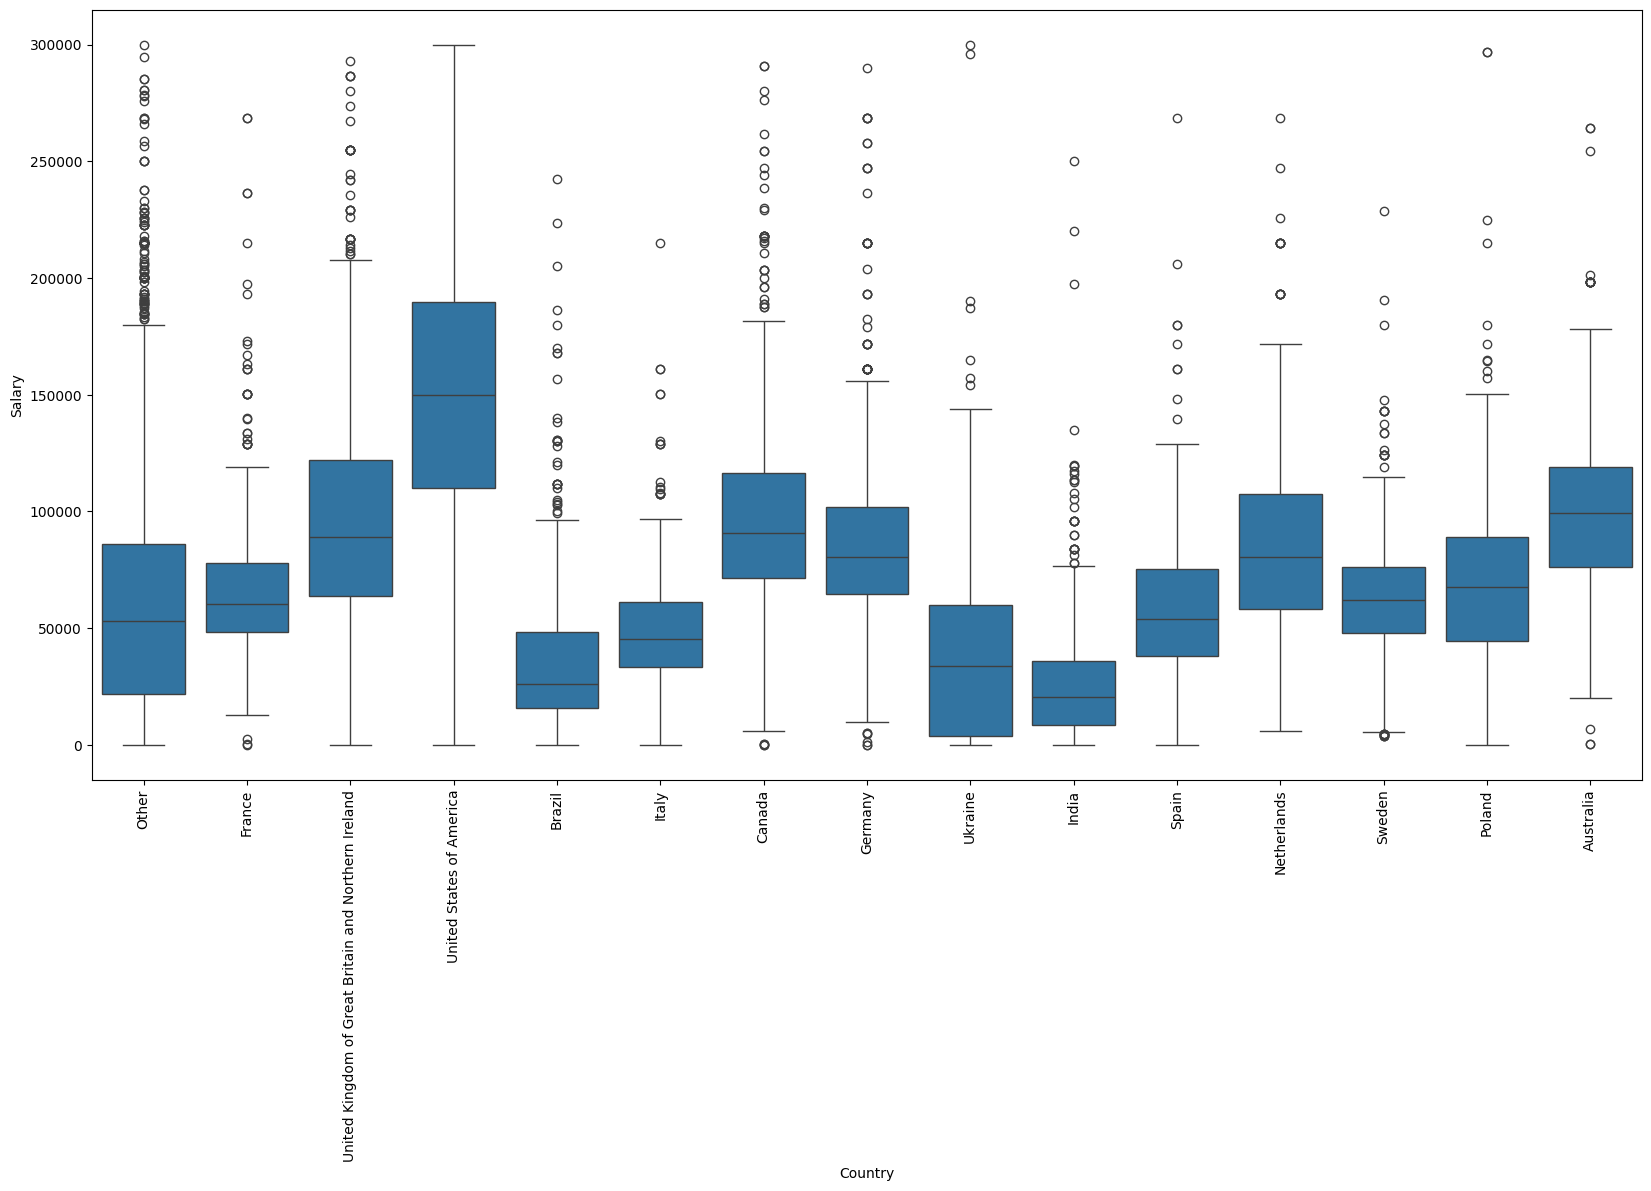

In [25]:
temp_df = full_df.copy()
temp_df = temp_df[temp_df["Salary"] <= 0.3*1e6]
plt.figure(figsize=(20, 10))
sns.boxplot(data=temp_df, x="Country", y="Salary")
plt.xticks(rotation=90)
plt.show()

In [26]:
df = load_df()
print(f"Dataframe shape: {df.shape}")
df.head(3)

Dataframe shape: (13956, 26)


,RemoteWork,EdLevel,YearsCodePro,Country,Age,Salary,"Developer, full-stack","Developer, back-end",JavaScript,SQL,...,PHP,Go,PowerShell,C++,Amazon Web Services (AWS),Microsoft Azure,Google Cloud,Cloudflare,Docker,npm
379,Remote,Master’s degree,6.0,Other,35-44 years old,91295.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
385,Remote,Master’s degree,17.0,France,35-44 years old,53703.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
392,"Hybrid (some remote, some in-person)",Post grad,18.0,United Kingdom of Great Britain and Northern I...,35-44 years old,161044.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


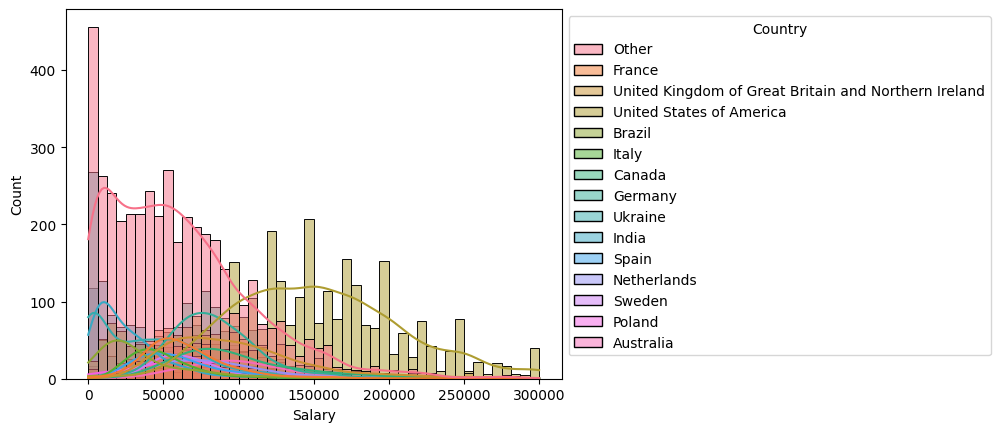

In [28]:
ax = sns.histplot(data=df, x="Salary", hue="Country", kde=True)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

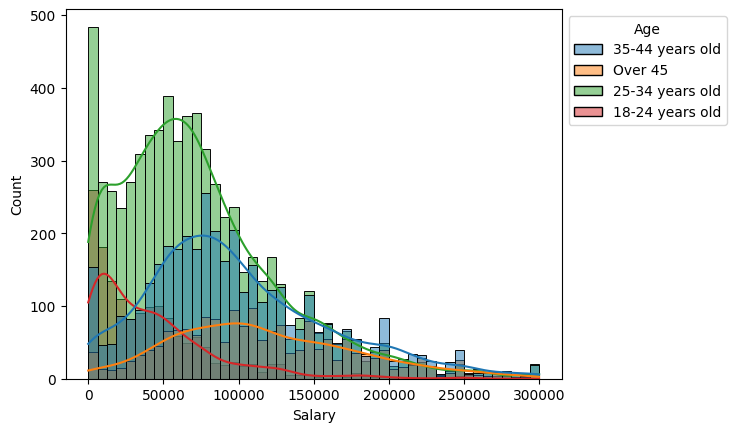

In [29]:
ax = sns.histplot(data=df, x="Salary", hue="Age", kde=True)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

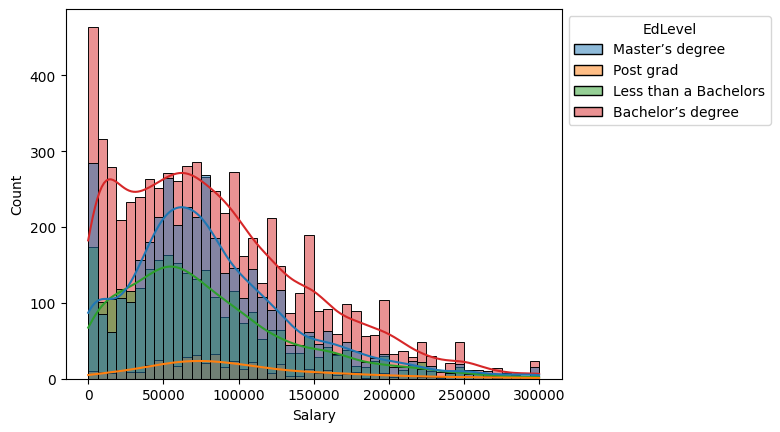

In [30]:
ax = sns.histplot(data=df, x="Salary", hue="EdLevel", kde=True)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

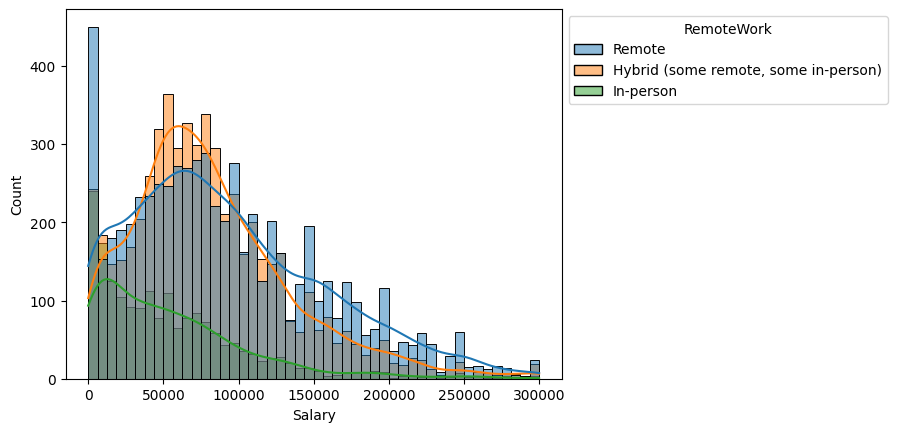

In [31]:
ax = sns.histplot(data=df, x="Salary", hue="RemoteWork", kde=True)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()